In [45]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [46]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [47]:
NUM_CLASSES = 24

# Dataset reading

In [48]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [49]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [51]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [52]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_4 (Dropout)          (None, 42)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)                860       
_________________________________________________________________
dropout_5 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_8 (Dense)              (None, 24)                264       
Total params: 1,334
Trainable params: 1,334
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [54]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [55]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
57/57 [==============================] - 1s 6ms/step - loss: 3.0451 - accuracy: 0.1082 - val_loss: 2.8466 - val_accuracy: 0.1243

Epoch 00001: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 2/1000
57/57 [==============================] - 0s 3ms/step - loss: 2.8043 - accuracy: 0.1397 - val_loss: 2.5914 - val_accuracy: 0.1861

Epoch 00002: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 3/1000
57/57 [==============================] - 0s 3ms/step - loss: 2.6260 - accuracy: 0.1591 - val_loss: 2.3957 - val_accuracy: 0.2186

Epoch 00003: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 4/1000
57/57 [==============================] - 0s 3ms/step - loss: 2.4740 - accuracy: 0.1817 - val_loss: 2.2290 - val_accuracy: 0.2672

Epoch 00004: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 5/1000
57/57 [==============================] - 0s 2ms/step - loss: 2.3409 - accuracy: 0.2103 - val_lo


Epoch 00037: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 38/1000
57/57 [==============================] - 0s 2ms/step - loss: 1.2993 - accuracy: 0.5154 - val_loss: 0.7731 - val_accuracy: 0.8473

Epoch 00038: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 39/1000
57/57 [==============================] - 0s 2ms/step - loss: 1.3052 - accuracy: 0.5213 - val_loss: 0.7692 - val_accuracy: 0.8423

Epoch 00039: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 40/1000
57/57 [==============================] - 0s 2ms/step - loss: 1.2951 - accuracy: 0.5222 - val_loss: 0.7616 - val_accuracy: 0.8497

Epoch 00040: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 41/1000
57/57 [==============================] - 0s 3ms/step - loss: 1.2917 - accuracy: 0.5255 - val_loss: 0.7624 - val_accuracy: 0.8382

Epoch 00041: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 42/1000
57/57 [==

57/57 [==============================] - 0s 2ms/step - loss: 1.1477 - accuracy: 0.5828 - val_loss: 0.6058 - val_accuracy: 0.9152

Epoch 00074: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 75/1000
57/57 [==============================] - 0s 3ms/step - loss: 1.1705 - accuracy: 0.5848 - val_loss: 0.6008 - val_accuracy: 0.9094

Epoch 00075: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 76/1000
57/57 [==============================] - 0s 3ms/step - loss: 1.1623 - accuracy: 0.5844 - val_loss: 0.5968 - val_accuracy: 0.9263

Epoch 00076: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 77/1000
57/57 [==============================] - 0s 2ms/step - loss: 1.1597 - accuracy: 0.5874 - val_loss: 0.5907 - val_accuracy: 0.9275

Epoch 00077: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 78/1000
57/57 [==============================] - 0s 3ms/step - loss: 1.1413 - accuracy: 0.5960 - val_loss: 0.589


Epoch 00110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 111/1000
57/57 [==============================] - 0s 2ms/step - loss: 1.0766 - accuracy: 0.6086 - val_loss: 0.5125 - val_accuracy: 0.9358

Epoch 00111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 112/1000
57/57 [==============================] - 0s 2ms/step - loss: 1.0713 - accuracy: 0.6103 - val_loss: 0.4996 - val_accuracy: 0.9399

Epoch 00112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 113/1000
57/57 [==============================] - 0s 3ms/step - loss: 1.0802 - accuracy: 0.6080 - val_loss: 0.5213 - val_accuracy: 0.9465

Epoch 00113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 114/1000
57/57 [==============================] - 0s 3ms/step - loss: 1.0956 - accuracy: 0.6030 - val_loss: 0.5217 - val_accuracy: 0.9366

Epoch 00114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 115/1000
57/5

57/57 [==============================] - 0s 3ms/step - loss: 1.0667 - accuracy: 0.6195 - val_loss: 0.4852 - val_accuracy: 0.9436

Epoch 00147: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 148/1000
57/57 [==============================] - 0s 3ms/step - loss: 1.0790 - accuracy: 0.6121 - val_loss: 0.4923 - val_accuracy: 0.9428

Epoch 00148: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 149/1000
57/57 [==============================] - 0s 3ms/step - loss: 1.0550 - accuracy: 0.6213 - val_loss: 0.4828 - val_accuracy: 0.9506

Epoch 00149: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 150/1000
57/57 [==============================] - 0s 3ms/step - loss: 1.0431 - accuracy: 0.6185 - val_loss: 0.4803 - val_accuracy: 0.9448

Epoch 00150: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 151/1000
57/57 [==============================] - 0s 3ms/step - loss: 1.0473 - accuracy: 0.6229 - val_loss: 0


Epoch 00183: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 184/1000
57/57 [==============================] - 0s 3ms/step - loss: 1.0277 - accuracy: 0.6259 - val_loss: 0.4589 - val_accuracy: 0.9543

Epoch 00184: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 185/1000
57/57 [==============================] - 0s 2ms/step - loss: 1.0253 - accuracy: 0.6281 - val_loss: 0.4532 - val_accuracy: 0.9485

Epoch 00185: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 186/1000
57/57 [==============================] - 0s 2ms/step - loss: 1.0561 - accuracy: 0.6229 - val_loss: 0.4634 - val_accuracy: 0.9481

Epoch 00186: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 187/1000
57/57 [==============================] - 0s 2ms/step - loss: 1.0256 - accuracy: 0.6314 - val_loss: 0.4541 - val_accuracy: 0.9481

Epoch 00187: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 188/1000
57/5

57/57 [==============================] - 0s 3ms/step - loss: 1.0009 - accuracy: 0.6453 - val_loss: 0.4284 - val_accuracy: 0.9498

Epoch 00220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 221/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.9927 - accuracy: 0.6390 - val_loss: 0.4339 - val_accuracy: 0.9411

Epoch 00221: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 222/1000
57/57 [==============================] - 0s 3ms/step - loss: 1.0375 - accuracy: 0.6277 - val_loss: 0.4398 - val_accuracy: 0.9490

Epoch 00222: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 223/1000
57/57 [==============================] - 0s 2ms/step - loss: 1.0034 - accuracy: 0.6391 - val_loss: 0.4288 - val_accuracy: 0.9477

Epoch 00223: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 224/1000
57/57 [==============================] - 0s 3ms/step - loss: 1.0017 - accuracy: 0.6489 - val_loss: 0


Epoch 00256: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 257/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.9901 - accuracy: 0.6458 - val_loss: 0.4072 - val_accuracy: 0.9510

Epoch 00257: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 258/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.9643 - accuracy: 0.6520 - val_loss: 0.4118 - val_accuracy: 0.9440

Epoch 00258: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 259/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.9793 - accuracy: 0.6457 - val_loss: 0.4153 - val_accuracy: 0.9403

Epoch 00259: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 260/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.9909 - accuracy: 0.6505 - val_loss: 0.4058 - val_accuracy: 0.9420

Epoch 00260: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 261/1000
57/5

57/57 [==============================] - 0s 3ms/step - loss: 0.9670 - accuracy: 0.6592 - val_loss: 0.3977 - val_accuracy: 0.9473

Epoch 00293: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 294/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.9712 - accuracy: 0.6537 - val_loss: 0.3975 - val_accuracy: 0.9457

Epoch 00294: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 00294: early stopping


In [56]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

19/19 [==============================] - 0s 1ms/step - loss: 0.3975 - accuracy: 0.9457


In [57]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [58]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[4.96766865e-02 3.46179405e-11 3.44473771e-13 9.18802446e-19
 8.00911279e-04 1.28881093e-02 7.63725438e-09 1.37446877e-19
 1.61527990e-13 6.34617203e-09 4.12380650e-11 2.23109297e-27
 1.40008716e-11 3.48985736e-07 1.12566417e-16 1.01859584e-07
 6.86552841e-03 4.60377714e-06 9.29506779e-01 1.84937855e-21
 2.84969260e-14 6.43468011e-05 1.80133386e-04 1.23953723e-05]
18


# Confusion matrix

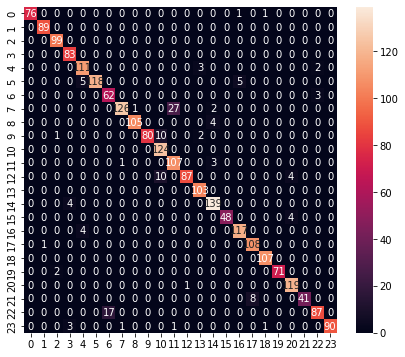

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        78
           1       0.99      1.00      0.99        89
           2       0.97      1.00      0.99        99
           3       0.92      1.00      0.96        83
           4       0.93      0.96      0.94       116
           5       1.00      0.92      0.96       128
           6       0.78      0.95      0.86        65
           7       0.98      0.81      0.89       156
           8       0.99      0.96      0.98       109
           9       1.00      0.86      0.92        93
          10       0.86      1.00      0.93       124
          11       0.79      0.96      0.87       111
          12       0.99      0.86      0.92       101
          13       0.95      1.00      0.98       103
          14       0.94      0.97      0.96       143
          15       1.00      0.92      0.96        52
          16       0.95      0.97      0.96       121
     

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [60]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [61]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\PIDRUZ~1\AppData\Local\Temp\tmpuv7v0ghg\assets


INFO:tensorflow:Assets written to: C:\Users\PIDRUZ~1\AppData\Local\Temp\tmpuv7v0ghg\assets


7280

# Inference test

In [62]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [63]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [64]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [65]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 999 µs


In [66]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[4.9676757e-02 3.4618003e-11 3.4447372e-13 9.1881279e-19 8.0091076e-04
 1.2888101e-02 7.6372819e-09 1.3744686e-19 1.6152830e-13 6.3461711e-09
 4.1238141e-11 2.2311184e-27 1.4000951e-11 3.4898568e-07 1.1256725e-16
 1.0185976e-07 6.8655172e-03 4.6037944e-06 9.2950666e-01 1.8493781e-21
 2.8497028e-14 6.4347034e-05 1.8013336e-04 1.2395357e-05]
18
